In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import zipfile

# !mkdir dataset
# !kaggle competitions download -c playground-series-s4e1 -p dataset

# with zipfile.ZipFile("dataset/playground-series-s4e1.zip","r") as zip_ref:
#     zip_ref.extractall("dataset")

# EDA

## Train Data

In [3]:
df = pd.read_csv("dataset/train.csv")
df.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [4]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


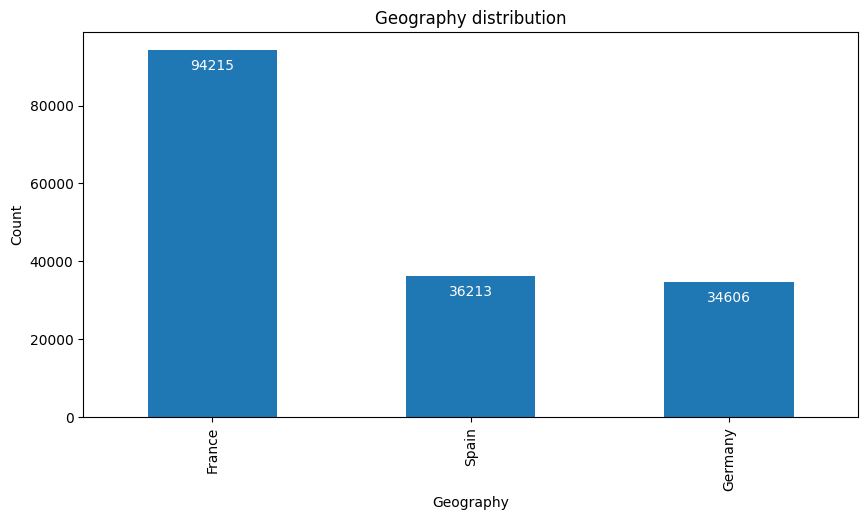

In [7]:
# Plot Geography distribution

plt.figure(figsize=(10,5))
plt.title("Geography distribution")
plt.xlabel("Geography")
plt.ylabel("Count")

# Add the value on top of the bar
for i in range(len(df.Geography.value_counts())):
    count = df.Geography.value_counts().values[i]
    plt.text(i,count - 5000,str(count), ha="center", color="white")
    
df.Geography.value_counts().plot(kind="bar")
plt.show()

<Axes: xlabel='Gender'>

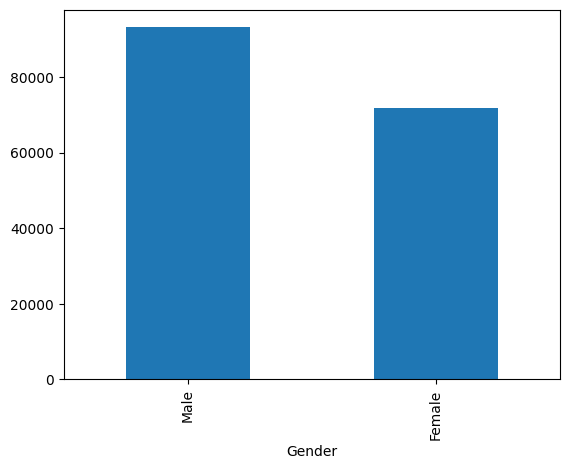

In [8]:
df.Gender.value_counts().plot(kind='bar')

<Axes: xlabel='Tenure'>

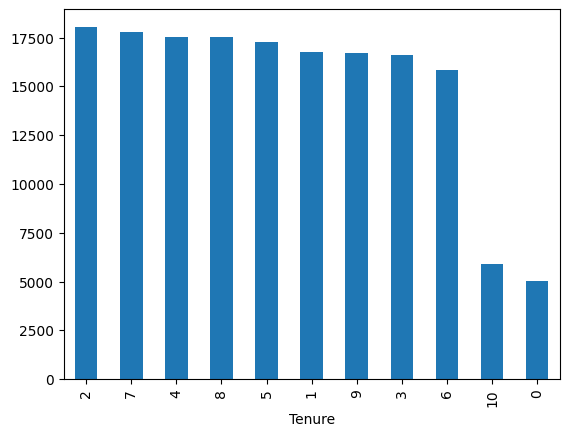

In [9]:
df.Tenure.value_counts().plot(kind='bar')

<Axes: xlabel='Exited'>

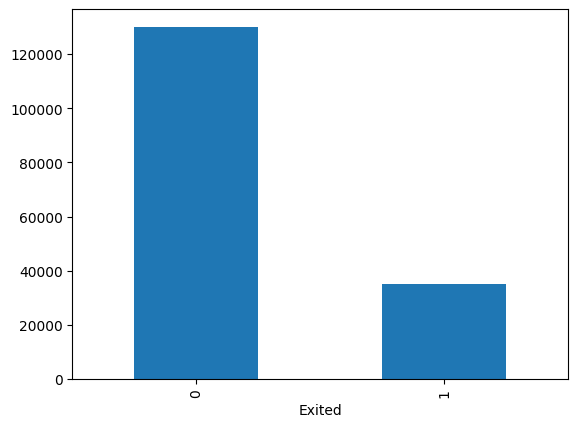

In [40]:
# Plot Exited distribution

df.Exited.value_counts().plot(kind='bar')

## Test Data

In [10]:
df_test = pd.read_csv("dataset/test.csv")
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [12]:
sample_submission = pd.read_csv("dataset/sample_submission.csv")
sample_submission.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


# Data Preprocessing

In [13]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [14]:
columns = df.columns
df_train = df.drop(columns=["id", "CustomerId", "Surname"])
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## Feature Enginerering

We will do some feature engineering to create new features from the existing ones. We will create the following features:
1. Features encoding. The most obvious to do is to encode the categorical into numerical features. We will use label encoding for 'Gender' and one-hot encoding for 'Geography'.
2. Binning. We will create bins for several features, like Age, Tenure, Balance, And EstimatedSalary. Example: for Age, we will create 4 bins: 18-32, 32-37, 37-42, and 42-92. It is based on quantile distribution.
3. Feature interaction. Create interaction between features. Example: we will compute IncomePerAge, CreditScorePerAge, BalanceToCreditScore, BalanceToEstimatedSalary.
4. Feature selection. We will select the features that we will use for training the model by computing Pearson correlation coefficient.
5. Feature Scaling. We will standardize the numerical features.

In [15]:
# 1. Features Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def features_encoding(df, column_ohe=None, column_le=None):
    # one-hot encoding
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    encoded_ohe = ohe.fit_transform(df[column_ohe])
    columns = ohe.get_feature_names_out(column_ohe)
    encoded_ohe_df = pd.DataFrame(encoded_ohe, columns=columns)

    df = df.drop(column_ohe, axis=1)
    df = pd.concat([df, encoded_ohe_df], axis=1)

    # label encoding
    if column_le == None:
        return df
    le = LabelEncoder()

    encoded_le = le.fit_transform(df[column_le])
    encoded_le_df = pd.DataFrame(encoded_le, columns=[column_le])
    df[column_le] = encoded_le_df

    return df


In [16]:
# 2. Binning

# We will create binning for columns: Age, Tenure, Balance, And EstimatedSalary
# Age: 18-32, 32-37, 37-42, and 42-92
# Tenure: 0-3, 3-5, 5-7, 7-10
# Balance: 0-200000, 200000-300000
# EstimatedSalary: 0-50000, 50000-100000, 100000-150000, 150000-200000

def binning_age(df):
    bins = df.Age.quantile([0, 0.25, 0.5, 0.75, 1]).values
    labels = ['Young', 'Mid-age', 'Old', 'Very Old']
    return pd.cut(df.Age, bins, labels=labels, include_lowest=True) 

def binning_tenure(df):
    bins = df.Tenure.quantile([0, 0.25, 0.5, 0.75, 1]).values
    labels = ['Short', 'Medium', 'Long', 'Very Long']
    return pd.cut(df.Tenure, bins, labels=labels, include_lowest=True)

def binning_balance(df):
    bins = [0, 200000, 250000, 300000]
    labels = ['Low', 'Medium', 'High']
    return pd.cut(df.Balance, bins, labels=labels, include_lowest=True)

def binning_salary(df):
    bins = [0, 50000, 100000, 150000, 200000]
    labels = ['Low', 'Medium', 'High', 'Very High']
    return pd.cut(df.EstimatedSalary, bins, labels=labels, include_lowest=True)

def binning(df):
    df['Binning_Age'] = binning_age(df)
    df['Binning_Tenure'] = binning_tenure(df)
    df['Binning_Balance'] = binning_balance(df)
    df['Binning_EstimatedSalary'] = binning_salary(df)
    return df

df_train = binning(df_train)
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Binning_Age,Binning_Tenure,Binning_Balance,Binning_EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,Mid-age,Short,Low,Very High
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,Mid-age,Short,Low,Low
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,Old,Very Long,Low,Very High
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,Mid-age,Short,Low,Medium
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,Mid-age,Medium,Low,Low


In [17]:
df_train[['Binning_Age', 'Binning_Tenure', 'Binning_Balance', 'Binning_EstimatedSalary']].isna().sum()

Binning_Age                0
Binning_Tenure             0
Binning_Balance            0
Binning_EstimatedSalary    0
dtype: int64

In [18]:
# 3. Feature Interaction

'''
We will compute:
- CreditScorePerAge = CreditScore / Age
- BalanceToCreditScore = Balance / CreditScore
- BalanceToEstimatedSalary = Balance / EstimatedSalary
# - IncomePerAge = EstimatedSalary / Age
'''

def feature_interactions(df):
    df['CreditScorePerAge'] = df.CreditScore / df.Age
    df['BalanceToCreditScore'] = df.Balance / df.CreditScore
    df['BalanceToEstimatedSalary'] = df.Balance / df.EstimatedSalary
    return df

df_train = feature_interactions(df_train)
df_train.head(10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Binning_Age,Binning_Tenure,Binning_Balance,Binning_EstimatedSalary,CreditScorePerAge,BalanceToCreditScore,BalanceToEstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,Mid-age,Short,Low,Very High,20.242424,0.000000,0.000000
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,Mid-age,Short,Low,Low,19.000000,0.000000,0.000000
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,Old,Very Long,Low,Very High,16.950000,0.000000,0.000000
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,Mid-age,Short,Low,Medium,17.088235,256.252220,1.760655
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,Mid-age,Medium,Low,Low,21.696970,0.000000,0.000000
5,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1,Mid-age,Medium,Low,High,16.333333,224.113231,0.968787
6,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0,Young,Very Long,Low,Low,19.766667,244.136071,4.859431
7,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0,Mid-age,Short,Low,High,18.324324,204.242493,1.295969
8,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0,Very Old,Medium,Low,High,15.720930,0.000000,0.000000
9,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0,Old,Medium,Low,Very High,14.575000,139.407084,0.475725


In [19]:
column_ohe = ['Geography', 'Binning_Age', 'Binning_Tenure', 'Binning_Balance', 'Binning_EstimatedSalary']
column_le = 'Gender'
df_train = features_encoding(df_train, column_ohe=column_ohe, column_le=column_le)
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Binning_Tenure_Medium,Binning_Tenure_Short,Binning_Tenure_Very Long,Binning_Balance_High,Binning_Balance_Low,Binning_Balance_Medium,Binning_EstimatedSalary_High,Binning_EstimatedSalary_Low,Binning_EstimatedSalary_Medium,Binning_EstimatedSalary_Very High
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
df_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'CreditScorePerAge', 'BalanceToCreditScore', 'BalanceToEstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Binning_Age_Mid-age', 'Binning_Age_Old', 'Binning_Age_Very Old',
       'Binning_Age_Young', 'Binning_Tenure_Long', 'Binning_Tenure_Medium',
       'Binning_Tenure_Short', 'Binning_Tenure_Very Long',
       'Binning_Balance_High', 'Binning_Balance_Low', 'Binning_Balance_Medium',
       'Binning_EstimatedSalary_High', 'Binning_EstimatedSalary_Low',
       'Binning_EstimatedSalary_Medium', 'Binning_EstimatedSalary_Very High'],
      dtype='object')

In [21]:
# 5. Feature Scaling

from sklearn.preprocessing import StandardScaler

def feature_scaling(df, column):
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[column])
    return df

column_scaling = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'CreditScorePerAge', 'BalanceToCreditScore', 'BalanceToEstimatedSalary']
df_train = feature_scaling(df_train, column_scaling)
df_train.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Binning_Tenure_Medium,Binning_Tenure_Short,Binning_Tenure_Very Long,Binning_Balance_High,Binning_Balance_Low,Binning_Balance_Medium,Binning_EstimatedSalary_High,Binning_EstimatedSalary_Low,Binning_EstimatedSalary_Medium,Binning_EstimatedSalary_Very High
0,0.144135,1,-0.578074,-0.719973,-0.883163,0.814298,1.0,0.0,1.369486,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.367706,1,-0.578074,-1.432694,-0.883163,0.814298,1.0,1.0,-1.254085,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.268974,1,0.211354,1.774548,-0.883163,0.814298,1.0,0.0,1.437422,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.941966,1,-0.465299,-1.076334,1.486918,-1.013348,1.0,1.0,-0.557018,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.743362,1,-0.578074,-0.007253,-0.883163,0.814298,1.0,1.0,-1.938770,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,-0.854578,1,-0.239748,-0.363613,1.214638,-1.013348,1.0,0.0,0.466260,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,-0.792159,0,-0.916401,1.061827,1.421493,-1.013348,1.0,0.0,-1.646018,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.268974,1,-0.126973,-1.432694,1.321262,-1.013348,1.0,0.0,-0.113798,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8,0.244006,1,0.549680,-0.363613,-0.883163,0.814298,1.0,0.0,0.603314,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,-0.916998,1,0.211354,-0.363613,0.410654,-1.013348,1.0,1.0,1.158582,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [22]:
df_train.corr().Exited.abs().sort_values(ascending=True)

BalanceToEstimatedSalary             0.001559
Binning_Balance_High                 0.002209
Binning_EstimatedSalary_High         0.003335
Binning_Balance_Low                  0.006858
Binning_Balance_Medium               0.007274
Binning_Tenure_Very Long             0.007751
Binning_EstimatedSalary_Medium       0.008867
Binning_EstimatedSalary_Low          0.012067
Binning_Tenure_Short                 0.014040
Binning_Tenure_Medium                0.014751
EstimatedSalary                      0.018827
Tenure                               0.019565
Binning_EstimatedSalary_Very High    0.021142
HasCrCard                            0.022141
Binning_Tenure_Long                  0.023221
CreditScore                          0.027383
Binning_Age_Old                      0.028310
Geography_Spain                      0.051175
Balance                              0.129743
BalanceToCreditScore                 0.130744
Geography_France                     0.130797
Gender                            

# Splitting Dataset

In [23]:
y = df_train["Exited"]
X = df_train.drop(columns=["Exited"])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScorePerAge,...,Binning_Tenure_Medium,Binning_Tenure_Short,Binning_Tenure_Very Long,Binning_Balance_High,Binning_Balance_Low,Binning_Balance_Medium,Binning_EstimatedSalary_High,Binning_EstimatedSalary_Low,Binning_EstimatedSalary_Medium,Binning_EstimatedSalary_Very High
0,0.144135,1,-0.578074,-0.719973,-0.883163,0.814298,1.0,0.0,1.369486,0.458488,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.367706,1,-0.578074,-1.432694,-0.883163,0.814298,1.0,1.0,-1.254085,0.191319,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.268974,1,0.211354,1.774548,-0.883163,0.814298,1.0,0.0,1.437422,-0.249510,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.941966,1,-0.465299,-1.076334,1.486918,-1.013348,1.0,1.0,-0.557018,-0.219784,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.743362,1,-0.578074,-0.007253,-0.883163,0.814298,1.0,1.0,-1.938770,0.771271,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

In [25]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling Exploration

In this section, we will explore some machine learning models to find the best model for our dataset.
1. We will start from simple model, like logistic regression, to more advanced model, like XGBoost, LightGBM, etc. and presumably ensemble model.
2. We will use 5-fold cross validation to evaluate the model performance.
3. For models that need hyperparameter tuning, such as XGBoost and LightGBM, we will use Optuna to find the best hyperparameter.


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn import svm, tree

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
print("AUC:", roc_auc_score(y_test, y_pred))

AUC: 0.8180475856339082


In [63]:
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
print("AUC:", roc_auc_score(y_test, y_pred))

AUC: 0.7267893759569287


In [64]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("AUC:", roc_auc_score(y_test, y_pred))

AUC: 0.7442998618148318


In [65]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1]
print("AUC:", roc_auc_score(y_test, y_pred))

AUC: 0.7040385219717066


In [66]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
scores = cross_val_score(eclf, X, y, scoring='roc_auc', cv=5)
scores.mean()

0.7022173177402214

# Model Training (After Feature Engineering)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn import svm, tree

In [ ]:
model = LogisticRegression()
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
scores.mean()

In [151]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
scores = cross_val_score(clf, X, y, scoring='roc_auc', cv=5)
scores.mean()

0.8804427240106841

In [149]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
scores = cross_val_score(eclf, X, y, scoring='roc_auc', cv=5)
scores.mean()

0.8536368117773241

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(n_estimators=100, random_state=0)
scores = cross_val_score(clf, X_test, y_test, cv=5, scoring='roc_auc')
scores.mean()

0.8862230588647962

## Other Models Exploration

For the next model exploration, we will use following models:
1. XGBoost
2. LightGBM
3. MLP


In [41]:
# 3. MLP

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=300, early_stopping=True).fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5, scoring='roc_auc')
scores.mean()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Byrocuy\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Byrocuy\miniconda3\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\Byrocuy\miniconda3\lib\site-packages\xgboost\sklearn.py", line 1519, in fit
    self._Booster = train(
  File "c:\Users\Byrocuy\miniconda3\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\Byrocuy\miniconda3\lib\site-packages\xgboost\training.py", line 182, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
  File "c:\Users\Byrocuy\miniconda3\lib\site-packages\xgboost\callback.py", line 241, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
  File "c:\Users\Byrocuy\miniconda3\lib\site-packages\xgboost\callback.py", line 241, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
  File "c:\Users\Byrocuy\miniconda3\lib\site-packages\xgboost\callback.py", line 426, in after_iteration
    raise ValueError(msg)
ValueError: Must have at least 1 validation dataset for early stopping.


In [ ]:
# 2. XGBoost

import xgboost as xgb
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, cross_validate

In [30]:
def fit_and_score(estimator, X_train, X_test, y_train, y_test):
    """Fit the estimator on the train set and score it on both sets"""
    estimator.fit(X_train, y_train, eval_set=[(X_test, y_test)])

    train_score = estimator.score(X_train, y_train)
    test_score = estimator.score(X_test, y_test)

    return estimator, train_score, test_score


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=94)

params = {}
params['booster'] = 'gbtree'
params['objective'] = 'binary:logistic'
params["eval_metric"] = 'auc'
params['eta'] = 0.05
params['max_depth'] = 6
params['min_child_weight']=1
params['max_delta_step'] = 0
params['subsample']= 0.8
params['colsample_bytree']= 0.8
params['seed'] = 0
params['early_stopping_rounds'] = 3

clf = xgb.XGBClassifier(**params)

results = {}

for train, test in cv.split(X, y):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    est, train_score, test_score = fit_and_score(
        clone(clf), X_train, X_test, y_train, y_test
    )
    results[est] = (train_score, test_score)

[0]	validation_0-auc:0.86069
[1]	validation_0-auc:0.87069
[2]	validation_0-auc:0.87662
[3]	validation_0-auc:0.87444
[4]	validation_0-auc:0.88087
[5]	validation_0-auc:0.88348
[6]	validation_0-auc:0.88499
[7]	validation_0-auc:0.88619
[8]	validation_0-auc:0.88538
[9]	validation_0-auc:0.88418
[0]	validation_0-auc:0.86091
[1]	validation_0-auc:0.86824
[2]	validation_0-auc:0.87440
[3]	validation_0-auc:0.87225
[4]	validation_0-auc:0.87814
[5]	validation_0-auc:0.88075
[6]	validation_0-auc:0.88173
[7]	validation_0-auc:0.88348
[8]	validation_0-auc:0.88252
[9]	validation_0-auc:0.88132
[10]	validation_0-auc:0.88255
[0]	validation_0-auc:0.86430
[1]	validation_0-auc:0.87170
[2]	validation_0-auc:0.87809
[3]	validation_0-auc:0.87599
[4]	validation_0-auc:0.88134
[5]	validation_0-auc:0.88375
[6]	validation_0-auc:0.88442
[7]	validation_0-auc:0.88566
[8]	validation_0-auc:0.88472
[9]	validation_0-auc:0.88343
[0]	validation_0-auc:0.85805
[1]	validation_0-auc:0.86690
[2]	validation_0-auc:0.87386
[3]	validatio

In [39]:
from sklearn.metrics import roc_auc_score

clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred = clf.predict_proba(X_test)[:,1]
print("AUC:", roc_auc_score(y_test, y_pred))

[0]	validation_0-auc:0.86356
[1]	validation_0-auc:0.87119
[2]	validation_0-auc:0.87673
[3]	validation_0-auc:0.87468
[4]	validation_0-auc:0.88052
[5]	validation_0-auc:0.88311
[6]	validation_0-auc:0.88402
[7]	validation_0-auc:0.88565
[8]	validation_0-auc:0.88465
[9]	validation_0-auc:0.88348
[10]	validation_0-auc:0.88471
AUC: 0.8856537721892385


In [3]:
results = {
    "logistic_regression": 0.5,
    "adaboost": 0.8,
    "voting_classifier": 0.9,
}

# print the results
for model, score in results.items():
    print(
        f"{model}: {score:.3f}"
    )

logistic_regression: 0.500
adaboost: 0.800
voting_classifier: 0.900


In [5]:
# print the results, sort it by the value descending
for model, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(
        f"{model}: {score:.3f}"
    )

voting_classifier: 0.900
xgboost: 0.900
adaboost: 0.800
logistic_regression: 0.500
